## import libraries like sklearn , matplotlib and pandas to work and pre-processing on dataset

In [1]:
# import numpy for array
import numpy as np
# import pandas for work with dataframe
import pandas as pd
# import matplotlib for visualization
import matplotlib.pyplot as plt
# import seaborn for some statistics visualization
import seaborn as sns
# import tensorflow
import tensorflow as tf
import keras
# import sklearn for regression features
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, BatchNormalization
# import r2_score and MSE from sklearn to evaluate model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
# cross validation
from sklearn.model_selection import KFold, cross_val_score

In [2]:
# read csv file
df = pd.read_csv('fdata.csv')

In [3]:
df . info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154804 entries, 0 to 154803
Columns: 186 entries, Unnamed: 0 to year
dtypes: float64(184), int64(2)
memory usage: 219.7 MB


In [4]:
df . drop(columns = 'Unnamed: 0' , inplace = True)
df = df . set_index('Address')
df . head(2)

,Cost_S01,Cost_S02,Cost_S03,Cost_S04,Cost_S05,Cost_S06,Cost_S07,Cost_S08,Cost_S09,Cost_S10,...,category_0.4,category_Free,category_Mortgage,category_Other.4,category_OwnedEstate,category_OwnedEstateLand,category_Rent,category_Service,Fasl,year
Address,,,,,,,,,,,,,,,,,,,,,
1.000100e+10,0.020902,0.005097,0.006148,0.011247,0.005131,0.0,420000.0,0.003410,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1398
1.000100e+10,0.028037,0.000000,0.001803,0.026497,0.008453,0.0,1600000.0,0.003082,0.005825,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,1398


In [5]:
cl = [] # corelation list
for item in df.columns:
    if item != 'Cost_S07' :
        cl . append(df['Cost_S07'] . corr(df[item]))
cl = np . array(cl)
print(f'Max of corelation : {max(cl)}')
print(f'Min of corelation : {min(cl)}')

Max of corelation : 0.34012029800611504
Min of corelation : -0.13703865845149818


In [6]:
def outl(dff , col) :
    q1 = dff[col] . quantile(0.25)
    q3 = dff[col] . quantile(0.75)
    iqr = q3 - q1
    ub = q3 + (1.5 * iqr)
    lb = 0
    mask = (dff[col] >= lb) & (dff[col] <= ub)
    dff = dff[mask]
    return dff

def outl2(dff) :
    q1 = np . quantile(dff , 0.25)
    q3 = np . quantile(dff , 0.75)
    iqr = q3 - q1
    ub = q3 + (1.5 * iqr)
    lb = q1 - (1.5 * iqr)
    mask = (dff >= lb) & (dff <= ub)
    dff = dff[mask]
    return dff

# train_test_amir
def train_test_amir(xx , yy , iteri) :
    dl = []
    for i in range(iteri) :
        dl2 = []
        if i == 0 : 
            xtr , xte , ytr , yte = train_test_split(xx , yy ,test_size = 0.8 , random_state = 42)
            dl2 . append(xtr)
            dl2 . append(ytr)
            dl . append(dl2)
        else :
            xtr , xte , ytr , yte = train_test_split(xte , yte ,test_size = 0.8 , random_state = 42)
            dl2 . append(xtr)
            dl2 . append(ytr)
            dl . append(dl2)
    dl2 = []
    dl2 . append(xte)
    dl2 . append(yte)
    dl . append(dl2)
    return dl

# define MASE
def mean_absolute_scaled_error(y_true, y_pred, y_train):
    mae_pred = mean_absolute_error(y_true, y_pred)
    naive_forecast = np.roll(y_train, 1)[1:]
    mae_naive = mean_absolute_error(y_train[1:], naive_forecast)
    mase = mae_pred / mae_naive
    return mase

## train test split

In [7]:
df2 = df . copy()
df2 = df2[df2['Fasl'] != 0]
print(df2 . shape)
msk1 = (df2['year'] == 1401) & (df2['Fasl'] == 4)
msk2 = (df2['category_1401'] != 1401) | (df2['Fasl'] != 4)
# tr = train / te = test
dftr = df2[msk2]
dfte = df2[msk1]
# delete outliers
dftr = outl(dftr , 'Cost_S07')
dfte = outl(dfte , 'Cost_S07')
# make train part and calidation part
y = dftr['Cost_S07']
scale = y.max()
y = y / scale
X = dftr . drop(columns = ['Cost_S07' , 'year' , 'Fasl'])
# make test part
y_test = dfte['Cost_S07'] / scale
x_test = dfte . drop(columns = ['Cost_S07' , 'year' , 'Fasl'])
print(f'Max of y = {scale}')

(151824, 184)
Max of y = 5500000.0


In [8]:
# model 1 - error !!
x_train , x_val , y_train , y_val = train_test_split(X , y ,test_size = 0.05 , random_state = 42)

In [9]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(131797, 181)
(6937, 181)
(8628, 181)
(131797,)
(6937,)
(8628,)


## develop ANN

In [10]:
from keras import backend as K
def r2_scori(y_test, y_pred):
    SS_res = K.sum(K.square(y_test - y_pred))
    SS_tot = K.sum(K.square(y_test - K.mean(y_test)))
    return 1 - SS_res / (SS_tot + K.epsilon())

In [11]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D
# Create the model
model = Sequential()
model.add(Dense(64, activation='tanh', input_shape=(X . shape[1],)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1, activation='linear'))  
model . summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                11648     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 13761 (53.75 KB)
Trainable params: 13761 (53.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# method 1
# model.compile(optimizer='adam', loss='mean_squared_error' , metrics=['accuracy'])
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse', r2_score] , run_eagerly = True)

In [14]:
history = model.fit(x_train, y_train, epochs = 5, batch_size = 32)

Epoch 1/5

Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
4119/4119 [==============================] - 266s 64ms/step - loss: 0.0363 - mae: 0.1411 - mse: 0.0363 - r2_score: 0.3153
Epoch 2/5
4119/4119 [==============================] - 269s 65ms/step - loss: 0.0326 - mae: 0.1337 - mse: 0.0326 - r2_score: 0.3852
Epoch 3/5
4119/4119 [==============================] - 257s 62ms/step - loss: 0.0317 - mae: 0.1313 - mse: 0.0317 - r2_score: 0.4042
Epoch 4/5
4119/4119 [==============================] - 261s 63ms/step - loss: 0.0312 - mae: 0.1297 - mse: 0.0312 - r2_score: 0.4111
Epoch 5/5
4119/4119 [==============================] - 278s 68ms/step - loss: 0.0309 - mae: 0.1288 - mse: 0.0309 - r2_score: 0.4160


In [15]:
pred_train = model.predict(x_train)
print(K.get_value(r2_score(K.constant(y_train), pred_train)))

4119/4119 [==============================] - 9s 2ms/step
0.4607594241347962


In [16]:
pred_val = model.predict(x_val)
print(K.get_value(r2_score(K.constant(y_val), pred_val)))

217/217 [==============================] - 1s 3ms/step
0.4402715376078231


In [17]:
pred_test = model.predict(x_test)
print(K.get_value(r2_score(K.constant(y_test), pred_test)))

270/270 [==============================] - 1s 2ms/step
0.4445477073667692


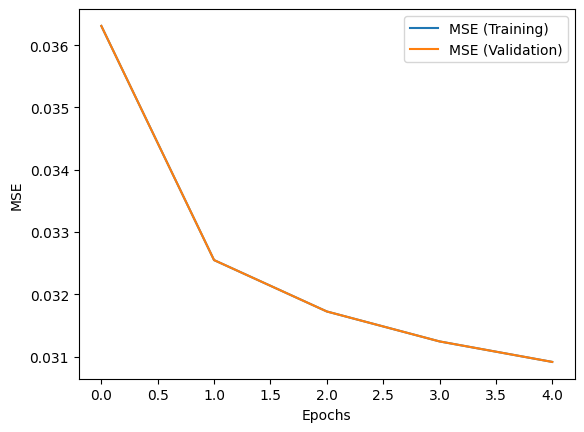

In [19]:
plt.plot(history.history['mse'], label='MSE (Training)')
plt.plot(history.history['mse'], label='MSE (Validation)')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

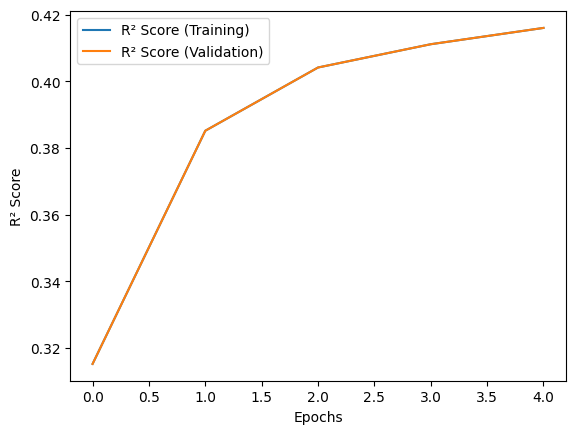

In [21]:
plt.plot(history.history['r2_score'], label='R² Score (Training)')
plt.plot(history.history['r2_score'], label='R² Score (Validation)')
plt.xlabel('Epochs')
plt.ylabel('R² Score')
plt.legend()
plt.show()

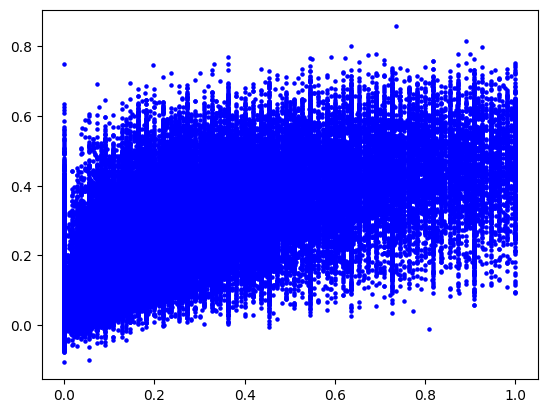

In [24]:
plt . scatter(y_train , pred_train , color = 'blue' , s = 5)
plt . show()

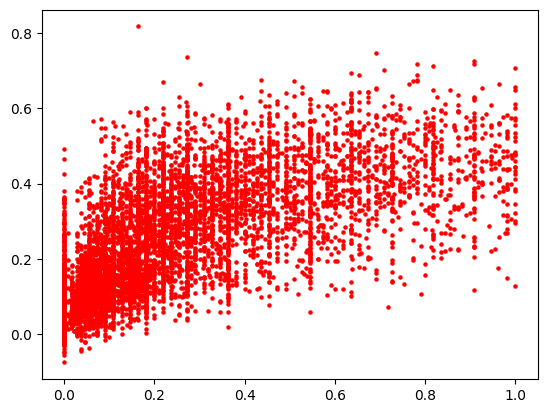

In [25]:
plt . scatter(y_val , pred_val , color = 'red' , s = 5)
plt . show()

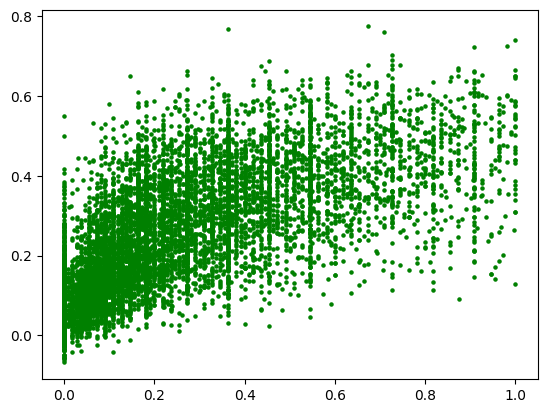

In [26]:
plt . scatter(y_test , pred_test , color = 'green' , s = 5)
plt . show()